<a href="https://colab.research.google.com/github/Prakuljn/Python/blob/main/E_commerce_data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/ecommerce_with_missing_values.csv")

In [ ]:
df.head()

,ProductID,ProductName,Category,Price,NumReviews,Rating,Stock,Discount,BestSeller
0,2001,NaN,NaN,1079.93,133.0,4.0,68,10.0,0
1,2002,Tablet,Electronics,997.52,95.0,1.0,93,NaN,0
2,2003,Headphones,Electronics,750.80,71.0,NaN,3,0.0,0
3,2004,Tablet,Electronics,688.54,64.0,2.0,46,10.0,0
4,2005,Phone,NaN,1179.23,184.0,1.0,30,0.0,1


In [ ]:
df.isnull().sum()

,0
ProductID,0
ProductName,79
Category,137
Price,0
NumReviews,0
Rating,0
Stock,0
Discount,0
BestSeller,0


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
si = SimpleImputer()

In [ ]:
df['NumReviews'] = si.fit_transform(df[['NumReviews']])
df['Rating'] = si.fit_transform(df[['Rating']])
df['Discount'] = si.fit_transform(df[['Discount']])

In [ ]:
df.isnull().sum()

,0
ProductID,0
ProductName,79
Category,137
Price,0
NumReviews,0
Rating,0
Stock,0
Discount,0
BestSeller,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['ProductName'] = lb.fit_transform(df['ProductName'])
df['Category'] = lb.fit_transform(df['Category'])

In [ ]:
lb = LabelEncoder()

In [ ]:
df.head()

,ProductID,ProductName,Category,Price,NumReviews,Rating,Stock,Discount,BestSeller
0,2001,5,3,1079.93,133.0,4.0,68,10.0,0
1,2002,4,2,997.52,95.0,1.0,93,NaN,0
2,2003,1,2,750.80,71.0,NaN,3,0.0,0
3,2004,4,2,688.54,64.0,2.0,46,10.0,0
4,2005,3,3,1179.23,184.0,1.0,30,0.0,1


In [ ]:
# importing libraries to make Graphical Representation of data
import matplotlib.pyplot as plt
import seaborn as sns

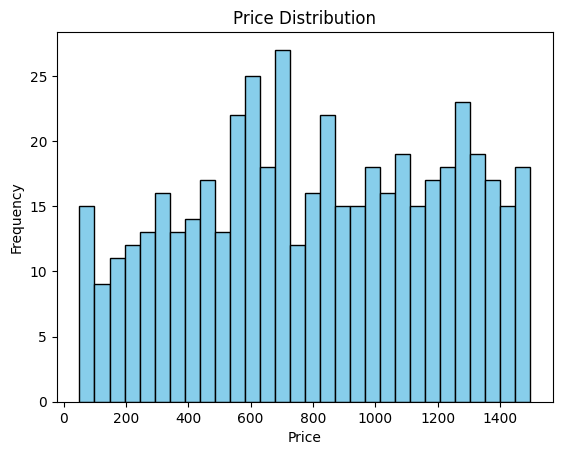

In [ ]:
plt.hist(df['Price'] , bins=30 , color='skyblue' , edgecolor = 'black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(columns=['BestSeller'])    # Features only
y = df['BestSeller']    # Target

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,
                                                      random_state=42)

In [ ]:
# Randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train , y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test , y_pred)

0.62

In [ ]:
# HyperParameter
# Importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Define your model and parameter Grid

In [ ]:
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[None , 10,20,30],
    'min_samples_split':[2,5,10]
}

In [ ]:
# Set up grid search

In [ ]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

NameError: name 'X_test' is not defined

In [ ]:
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))